
Bienvenidos, esto es LSTM-AI

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Cargar el dataset
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

# Eliminar filas con valores NaN
data_clean = data.dropna()

# Mostrar información relevante
data_info = {
    "original_data_head": data.head(),
    "clean_data_head": data_clean.head(),
    "original_data_length": len(data),
    "clean_data_length": len(data_clean)
}

data_info


{'original_data_head':     Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
 0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
 1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
 2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
 3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
 4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   
 
    Weighted_Price  
 0            4.39  
 1             NaN  
 2             NaN  
 3             NaN  
 4             NaN  ,
 'clean_data_head':        Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
 0     1325317920  4.39  4.39  4.39   4.39      0.455581           2.000000   
 478   1325346600  4.39  4.39  4.39   4.39     48.000000         210.720000   
 547   1325350740  4.50  4.57  4.50   4.57     37.862297         171.380338   
 548   1325350800  4.58  4.58  4.58   4.58      9.000000  

In [3]:
#predecir el precio de cierre ('Close')
prices = data_clean['Close'].values.reshape(-1, 1)

sequence_length = 60  # Por ejemplo, usar los últimos 60 puntos para predecir el próximo

# Normalizar los precios para el entrenamiento de la red neuronal
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Creación de secuencias para LSTM
def create_sequences(data, sequence_length):
    xs, ys = [], []
    for i in range(len(data) - sequence_length):
        xs.append(data[i:(i + sequence_length)])
        ys.append(data[i + sequence_length])
    return np.array(xs), np.array(ys)

X, y = create_sequences(prices_scaled, sequence_length)




In [4]:
# Dividir datos para entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [5]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Mostrar el resumen del modelo para verificar la configuración
model.summary()

C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=1, batch_size=32)

90343/90343 ━━━━━━━━━━━━━━━━━━━━ 2029s 22ms/step - loss: 2.4445e-07


22586/22586 ━━━━━━━━━━━━━━━━━━━━ 160s 7ms/step


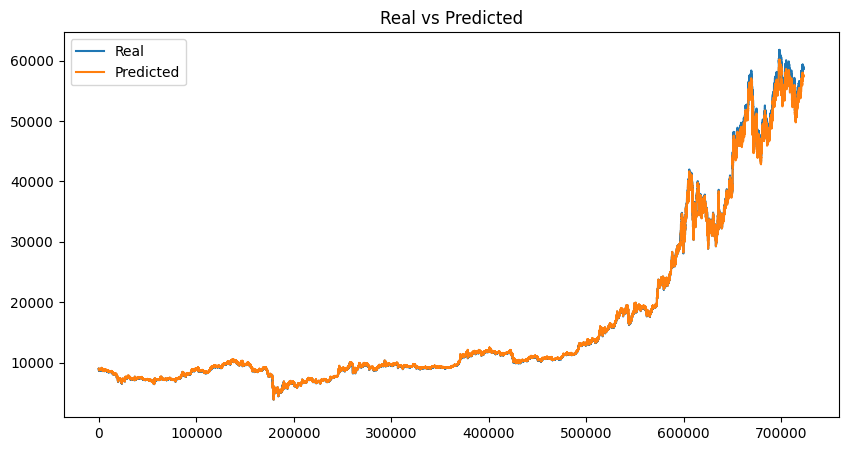

In [9]:
# Predicción y visualización de resultados

predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
real = scaler.inverse_transform(y_test.reshape(-1, 1))


# Opcional: visualización
plt.figure(figsize=(10, 5))
plt.plot(real, label='Real')
plt.plot(predicted, label='Predicted')
plt.title('Real vs Predicted')
plt.legend()
plt.show()


In [19]:
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2.16.1
Num GPUs Available:  0
